In [1]:
import os, time, random
import numpy as np
import pandas as pd
import shutil as sh

from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pre-processing

img_h, img_w, num_channels = (380, 676, 3)

df = pd.read_csv('./car_detection_dataset/labels.csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [3]:
!python ./yolov5/detect.py --weights yolov5/yolov5s.pt --img 640 --conf 0.5 --source ./car_detection_dataset/testing_images

detect: weights=['yolov5/yolov5s.pt'], source=./car_detection_dataset/testing_images, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-128-gb96f35c Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3080, 9987MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 /home/jb/csc2503_project/car_detection_dataset/testing_images/vid_5_25100.jpg: 416x704 (no detections), 38.8ms
image 2/175 /home/jb/csc2503_project/car_detection_dataset/testing_images/vid_5_25120.jpg: 416x704 (no detectio

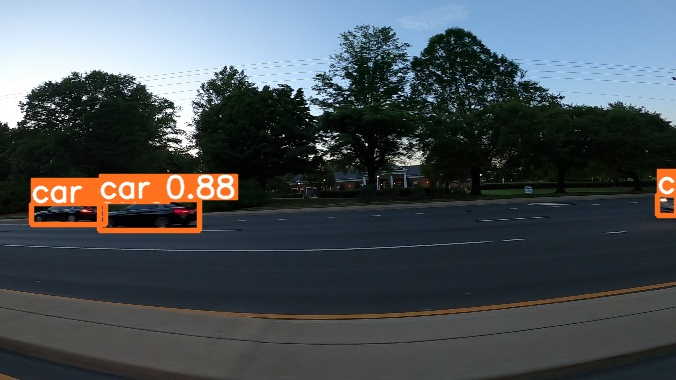

In [9]:
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("./yolov5/runs/detect/exp2"):
    predicted_files.extend(filenames)

Image(filename=f'./yolov5/runs/detect/exp2/{random.choice(predicted_files)}')